In [34]:
import warnings
warnings.filterwarnings('ignore')

Dependencies

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import numpy
import requests as rq
import pandas as pd
from io import BytesIO
import json

# Context:

* Human Capital Index (HCI) is a complex index created in 2018. It combines indicators of health and education into a measure of the human capital that a child born today can expect to obtain by her 18th birthday, given the risks of poor education and health that prevail in the country where she lives. The HCI is measured in units of productivity relative to a benchmark of complete education and full health, and ranges from 0 to 1. A value of x on the HCI indicates that a child born today can expect to be only x x100 percent as productive as a future worker as she would be if she enjoyed complete education and full health. The methodology of the HCI is anchored in the extensive literature on development accounting. For this excercise we are going to focus on the atribute of the index to meassure in 2018 the risks of poor education and health that prevail in the specific countries selected to  understand the conditions and gender differences in labor force participation, employers, employment by sector, population and unemployment in realation to the index.

Some questions raised for this study are as following:
* Is a Human Capital Index over 0.5 related to a high percentage of female or male labor participation?
* Is a Human Capital Index over 0.5 related to a more female or male employers?
* Meassure the impact of labour productivity (agricultural, industry, services sectors) on HCI.
* How do large populations and low unemployment affect the HCI?

We will try to prove as an Alternate hypothesis if the selected labor conditions of the countries generate an over 0.5 HCI.  If there is no relation we can say we have reached a Null Hypothesis. 





In [4]:
#Create path and read the  labor force participation and Human Development Index cvs.  
#Convert them into data frames.
#Set Country Name as index.
#Format numbers to 2 decimal places for easier data reading.
#Rename some columns.

csv_path = os.path.join('clean_data','labor_force_participation.csv')
with open(csv_path) as csvfile:
    labor_force_df = pd.read_csv(csv_path, header=[0])
    labor_force_df = pd.DataFrame(labor_force_df)
    labor_force_df = labor_force_df.set_index('Country Name')
    

csv_path = os.path.join('clean_data','hci_df.csv')
with open(csv_path) as csvfile:
    HCI_df = pd.read_csv(csv_path, header=[0])
    HCI_df = pd.DataFrame(HCI_df)
    HCI_df = HCI_df.set_index('Country Name')
    HCI_df = HCI_df.rename(columns={"2018 [YR2018]": "HCI"})
    HCI_df["HCI"] = HCI_df["HCI"].map("{:.2f}".format)
   

#HCI_df
labor_force_df


,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,
Brazil,60.90,79.97
Argentina,59.02,79.70
Colombia,62.55,85.12
United States,67.23,78.00
United Kingdom,73.08,82.40
United Arab Emirates,53.16,93.95
Turkey,38.15,78.39
Norway,75.27,80.13
Greece,60.17,76.56


In [6]:
HCI_total= pd.merge(HCI_df, labor_force_df, how="left", on=["Country Name", "Country Name"])
pd.to_numeric(HCI_total["HCI"]).astype(float)
pd.to_numeric(HCI_total["Labor Force Participation Female - 2018"]).astype(float)
pd.to_numeric(HCI_total["Labor Force Participation Male - 2018"]).astype(float)
HCI_total

,,HCI,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,Country Name,,,
Brazil,Brazil,0.55,60.90,79.97
Argentina,Argentina,0.62,59.02,79.70
Colombia,Colombia,0.60,62.55,85.12
United States,United States,0.71,67.23,78.00
United Kingdom,United Kingdom,0.78,73.08,82.40
United Arab Emirates,United Arab Emirates,0.68,53.16,93.95
Turkey,Turkey,0.63,38.15,78.39
Norway,Norway,0.77,75.27,80.13
Greece,Greece,0.69,60.17,76.56


# Is a Human Capital Index over 0.5 related to a high percentage of female or male labor participation?

In [9]:
HCI_count = len(HCI_total['HCI'])
HCI_count

18

In [11]:
#HCI_ranking = HCI_total[(HCI_total["HCI"] >= 0.5)].count()["HCI"]
#HCI_ranking
#Passing_HCI_ranking =HCI_ranking / float(HCI_count) * 100
#Countries_high_hci = HCI_ranking.groupby(["Country Name"])

#High_HCI_ranking = HCI_ranking.groupby(["Country Name"])

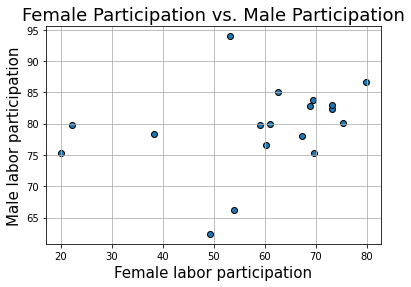

In [13]:
labor_force_participation_plot = plt.scatter(HCI_total['Labor Force Participation Female - 2018'],HCI_total['Labor Force Participation Male - 2018'],marker='o',edgecolors='black')
plt.grid()
plt.title('Female Participation vs. Male Participation',size=18)
plt.xlabel('Female labor participation',size=15)
plt.ylabel('Male labor participation',size=15)
#plt.savefig('raw_data/Fig1.png')
plt.show()

In [14]:
# Create FemaleLP and MaleLP Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
high_ranking_HCI = HCI_total[HCI_total['HCI'] >= 0.5]

#Southern Hemisphere (Lat < 0)
low_ranking_HCI = HCI_total[HCI_total['HCI'] < 0.5]

TypeError: '>=' not supported between instances of 'str' and 'float'

# Helper Functions to Generate and Plot Data

In [3]:
# Generate some fake data to test with
def gendata(loc=0):
    population = stats.norm.rvs(size=1000, random_state=42)
    sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

# One Sample T-Tests

One Sample t-tests allow you to compare your sample mean to the population mean.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is randomly sampled

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html

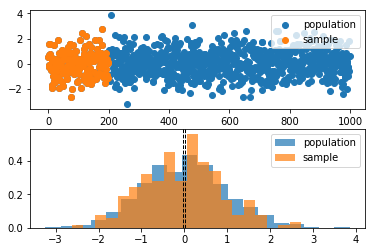

In [4]:
# Generate some data and show the scatter plot
population, sample = gendata()

In [5]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.912976906342992, pvalue=0.36235943886051503)

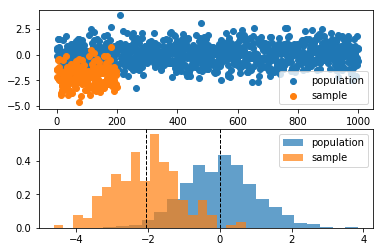

In [6]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=-2)

In [7]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-31.293376800980507, pvalue=8.6800698449009275e-79)